<a href="https://colab.research.google.com/github/janchorowski/nn_assignments/blob/nn18/lectures/08_convolutions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
!pip install -q JSAnimation gdown httpimport

In [0]:
from __future__ import absolute_import
from __future__ import division
from __future__ import print_function

In [3]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [0]:
import skimage.io
from scipy.ndimage.filters import convolve

import httpimport
with httpimport.github_repo('janchorowski', 'nn_assignments', 
                            module='common', branch='nn18'):
    from common.plotting import plot_mat

# Convolutions

The convolution operation applies the same filter at all locations in an image.

more info:
* http://deeplearning.net/tutorial/lenet.html
* https://en.wikipedia.org/wiki/Convolution 
* https://en.wikipedia.org/wiki/Kernel_%28image_processing%29

lena.shape (512, 512, 3)
lena.dtype float64


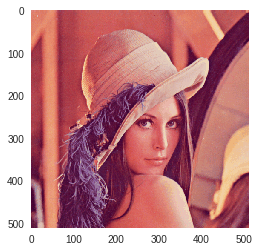

In [5]:
lena = skimage.io.imread('https://raw.githubusercontent.com/janchorowski/nn_assignments/nn17_fall/lecture_notebooks/07-lena.gif')
lena = lena / 255.
print("lena.shape", lena.shape)
print("lena.dtype", lena.dtype)
imshow(lena)
grid(False)

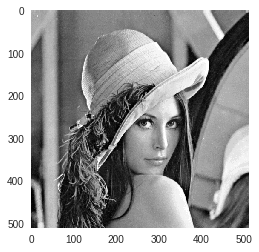

In [6]:
lena_bw = lena.mean(2)
imshow(lena_bw, cmap='gray')
grid(False)

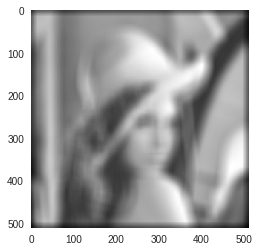

In [7]:
#the mode argument controls how the image is extended. constant mode simply pads it with zeros

imshow(convolve(lena_bw, ones((30, 30)), mode='constant'), cmap='gray')
grid(False)

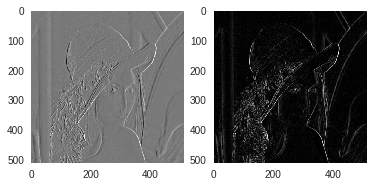

In [8]:
# This 2d convolution filter will detect vertical edges

filter_sobel_vertical = [
    [-1, 0, 1],
    [-2, 0, 2],
    [-1, 0, 1]
    ]

ev = convolve(lena_bw, filter_sobel_vertical)

subplot(121)
imshow(ev, cmap='gray')
grid(False)
subplot(122)
imshow(np.abs(ev), cmap='gray')
grid(False)

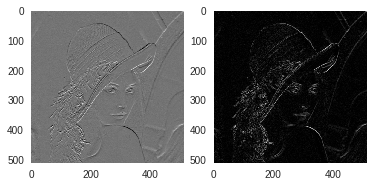

In [9]:
# This 2d convolution filter will detect horizontal edges

filter_sobel_horizontal = [
    [-1, -2, -1],
    [ 0,  0,  0],
    [ 1,  2,  1]
    ]

eh = convolve(lena_bw, filter_sobel_horizontal)

subplot(121)
imshow(eh, cmap='gray')
grid(False)
subplot(122)
imshow(np.abs(eh), cmap='gray')
grid(False)

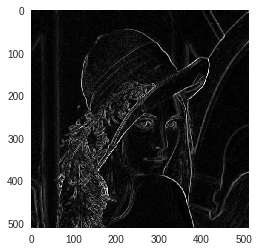

In [10]:
# Practical tip: in image processing we typically average the magnitudes
# of horizontal and vertical Sobel filters:

# edges = ev + eh
edges = np.abs(ev) + np.abs(eh) # Try uncommenting these!
edges = np.sqrt(ev**2 + eh**2)

imshow(edges, cmap="gray")
grid(False)

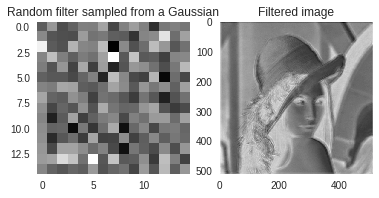

In [11]:
# we'll investigate convolutions with a random filter
# quite often we get a poor edge detector

filter = randn(15,15)

lena_filtered = convolve(lena_bw, filter, mode='constant')

subplot(1,2,1)
title('Random filter sampled from a Gaussian')
imshow(filter, interpolation='nearest', cmap='gray')
grid(False)

subplot(1,2,2)
title('Filtered image')
imshow(lena_filtered, cmap='gray')
grid(False)

# Pooling

Convolution transforms an image (e.g. detects edges). Pooling combines convolution's output in a small neighborhood to achieve invariance to small shifts of the input image

In [0]:
def max_pool(img, nr, nc):
    im_r, im_c = img.shape
    im_ret = np.zeros((int(np.floor(im_r/nr)), int(np.floor(im_c/nc))))
    for r in range(im_ret.shape[0]):
        for c in range(im_ret.shape[1]):
            im_ret[int(r),int(c)
                  ] = img[r*nr:(r+1)*nr, c*nc:(c+1)*nc].max()
    return im_ret

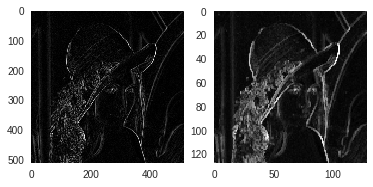

In [13]:
filtered = convolve(lena_bw, filter_sobel_vertical)

filtered=np.abs(filtered)

subplot(1,2,1)
imshow(filtered, cmap='gray')
grid(False)

subplot(1,2,2)
imshow(max_pool(filtered,4,4), cmap='gray')
grid(False)